In [11]:
savedir = "../../plots/singlelep/123j1b/"
selection = 'mu'


In [46]:
from pylab import *
plt.rc('figure',facecolor='w')

In [47]:
ptbin = np.array([25,26,28,30,32,34,36,38,40,45,50,55,60,80])
etabin = np.array([-2.5, -2.0, -1.8, -1.444, -1.1, -0.8, -0.4, 0.0, 0.4, 0.8, 1.1, 1.444, 1.8, 2.0, 2.5])

ptcenter = (ptbin[:-1]+ptbin[1:])/2
pthalfr =  (ptbin[:-1]-ptbin[1:])/2

etacenter = (etabin[:-1]+etabin[1:])/2
etahalfr =  (etabin[:-1]-etabin[1:])/2

In [12]:
sf = np.load("{}/SF_{}_2d.npy".format(savedir,selection))
sferr = np.load("{}/SF_std_{}_2d.npy".format(savedir,selection))

Text(0.5, 1.0, 'SF e')

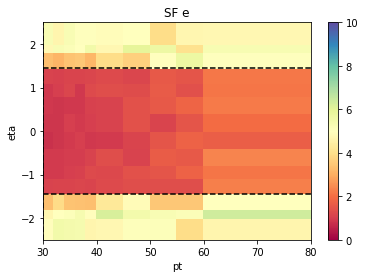

In [12]:
plt.pcolor(ptbin, etabin, sf.T, cmap="Spectral",vmax=10,vmin=0)
plt.colorbar()
plt.xlabel("pt")
plt.ylabel("eta")
plt.axhline(1.444,color='k',linestyle="--")
plt.axhline(-1.444,color='k',linestyle="--")
plt.axvline(30,color='k',linestyle="--")
plt.title("SF "+selection)

In [13]:
sf = (sf[:,:]+sf[:,::-1])[:,:7]/2

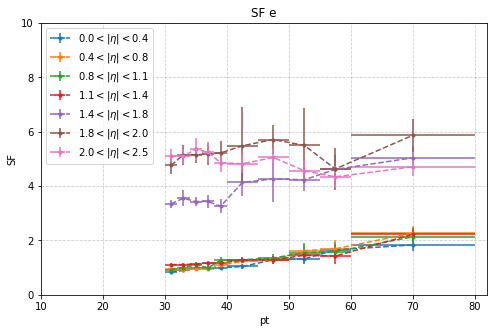

In [14]:
plt.figure(figsize=(8,5))
for i in range(6,-1,-1):
    text = "{:.1f}".format(abs(etacenter[i]-etahalfr[i]))+r"$<|\eta|<$"+"{:.1f}".format(abs(etacenter[i]+etahalfr[i]))    
    plt.errorbar(ptcenter, sf[:,i],xerr=pthalfr, yerr=sferr[:,i], fmt='.--', label=text )
plt.legend(loc="upper left")
plt.xlabel("pt")
plt.ylabel("SF")
plt.title("SF "+selection)
plt.grid(color="grey",linestyle="--",alpha=0.4)
plt.xlim(10,82)
plt.ylim(0,10)
plt.savefig("{}/SF_{}_1d.png".format(savedir,selection),dpi=300)

array([10,  8,  8])

In [13]:
sf[np.array([1,1,3]),np.array([1,1,3])]

array([3.15289212, 3.15289212, 2.2371757 ])

In [1]:
from utility_dfplotter import *

In [2]:
p = DFPlotter("mu4j", '>=1', njet=None, folderOfPickles='pickles_2016')
dfList = p.getDataFrameList()

/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mu4j_fakes/
/home/zchen/D

In [64]:
j = np.searchsorted(etabin, dfList[0].lepton1_eta)
i = np.searchsorted(ptbin, dfList[0].lepton1_pt)
sfpad = np.pad(sf,((1,1),(1,1)),constant_values=((0, 0),(0,0)))
w = sfpad[i,j]
dfList[0].eventWeight= dfList[0].eventWeight*w

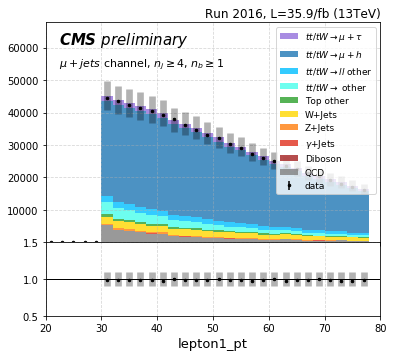

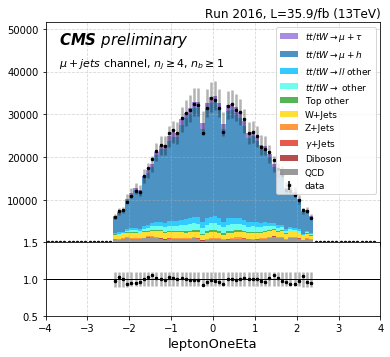

In [3]:
v,a,b,step,xl  = ('lepton1_pt', 20, 80, 2, 'lepton1_pt')
sk = ASingleKinematicPlot(v,a,b,step,dfList)
sk.settingPlot(xl,p.labelList, p.colorList,logscale=False, withXsErr=True, period=p.period, subtitle=p.subtitle)
sk.makePlot()

v,a,b,step,xl  = ('lepton1_eta',-4, 4, 0.1, 'leptonOneEta')
sk = ASingleKinematicPlot(v,a,b,step,dfList)
sk.settingPlot(xl,p.labelList, p.colorList,logscale=False, withXsErr=True, period=p.period, subtitle=p.subtitle)
sk.makePlot()

In [4]:
dfList[0]

,nMuons,nElectrons,nTaus,nJets,nBJets,nPV,nPU,trTest,genCategory,nPartons,...,nBJetsJERUp,nBJetsJERDown,nBJetsBTagUp,nBJetsBTagDown,nBJetsMistagUp,nBJetsMistagDown,lepton1_recostd,lepton1_idstd,lepton2_recostd,lepton2_idstd
0,0,0,1,5,2,12,0.000000,1,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
1,0,0,1,3,1,13,0.000000,1,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
2,0,0,1,2,1,14,0.000000,1,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
3,0,0,1,2,1,20,0.000000,1,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
4,0,0,1,5,1,12,0.000000,1,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,0,0,1,3,1,17,28.177950,1,15,3,...,1,1,1,1,1,1,0.000215,0.000292,0.0,0.243051
5532,0,0,1,4,1,21,27.701870,1,17,5,...,1,1,1,1,1,1,0.000462,0.002001,0.0,0.243051
5533,0,0,1,4,1,22,24.176729,1,17,5,...,1,1,1,1,1,1,0.000130,0.000259,0.0,0.243051
5534,0,0,1,4,3,22,32.666119,1,17,5,...,3,3,3,3,3,3,0.000470,0.001568,0.0,0.243051


In [4]:
dfList[0].lepton1_pt[0], dfList[0].lepton1_eta[0],dfList[0].eventWeight[0]

(73.49505615234375, -0.2410191893577577, 2.4316447543253243)

In [10]:
dfList[0].eventWeight

0         1.878897
1         2.226615
2         3.282545
3         1.859148
4         2.013167
            ...   
222127   -0.316028
222128   -0.329405
222129   -0.296928
222130   -0.353883
222131   -0.473530
Name: eventWeight, Length: 222132, dtype: float64

In [14]:
sf

array([[3.40331103, 2.97760111, 2.66911964, 2.15705421, 1.82285794,
        1.63770583, 1.47581995, 1.53648634, 1.66864762, 1.81517736,
        2.12261304, 2.61405863, 3.00957965, 3.34689552],
       [3.40211128, 3.15289212, 2.61855628, 2.16721973, 1.79814254,
        1.60299529, 1.52644766, 1.5329949 , 1.67536787, 1.84038408,
        2.14957436, 2.62820539, 3.02402743, 3.47522557],
       [3.58834335, 3.11217292, 2.69353494, 2.19032811, 1.83291463,
        1.64277375, 1.54318093, 1.53561542, 1.65819569, 1.87171539,
        2.21288286, 2.70750077, 3.04485097, 3.40894137],
       [3.75439487, 3.04136304, 2.70952009, 2.2371757 , 1.85826694,
        1.66271345, 1.56228248, 1.58603431, 1.69932627, 1.93828353,
        2.21448963, 2.73663904, 3.0540586 , 3.454528  ],
       [3.75394988, 3.17587215, 2.77709015, 2.19007597, 1.81863399,
        1.70688706, 1.53050549, 1.61020383, 1.70970781, 1.92650717,
        2.20501909, 2.77892877, 3.32332939, 3.63845367],
       [3.9615355 , 3.65504287, 2.7